In [2]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import hashlib

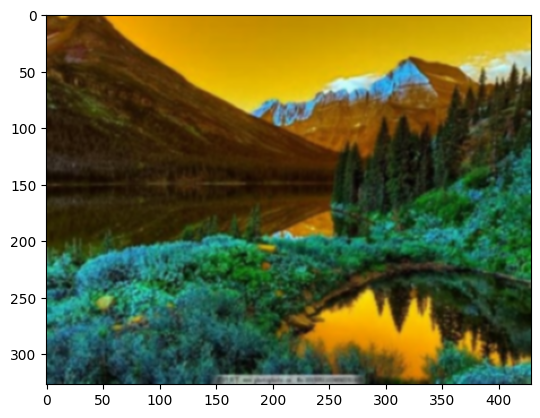

In [2]:
# 将图像转换为浮点数格式
img = cv2.imread('th.jpg')
img_float = np.float32(img)

# 定义高斯核大小和标准差
ksize = (5, 5)
sigma = 1.0

# 使用高斯滤波器平滑图像
img_smooth = cv2.GaussianBlur(img_float, ksize, sigma)

# 将浮点数格式的图像转换为整数格式
img_smooth = np.uint8(img_smooth)


#gray_img = cv2.cvtColor(img_float, cv2.COLOR_BGR2GRAY)
cv2.imwrite('text2.jpg',img_smooth)

plt.imshow(img_smooth)

In [3]:
def encode(img_path, wm_path, res_path, alpha):
    img = cv2.imread(img_path)
    img_f = np.fft.fft2(img)

    #img_f= np.fft.fftshift(img_f)
    
    height, width, channel = np.shape(img)
    watermark = cv2.imread(wm_path)
    wm_height, wm_width = watermark.shape[0], watermark.shape[1]
    if wm_height < height or wm_width < width:
    # 如果水印图像的形状小于频域数据的形状，使用 numpy.resize() 进行拉伸
        watermark = np.resize(watermark, (height, width))
    elif wm_height > height or wm_width > width:
    # 如果水印图像的形状大于频域数据的形状，使用 numpy.pad() 进行填充
        top = (wm_height - height) // 2
        left = (wm_width - width) // 2
        watermark = watermark[top:top+height, left:left+width]
    else:
    # 如果水印图像的形状和频域数据的形状相同，不需要进行调整
        pass

    x, y = list(range(int(height / 2))), list(range(width))
    random.seed(height + width)
    random.shuffle(x)
    random.shuffle(y)
    tmp = np.zeros(img.shape)
    '''for t in range(alpha):
        for i in range(int(height / 2)):
            for j in range(width): 

                if x[i] < wm_height and y[j] < wm_width:
                    tmp[i][j] = watermark[x[i]][y[j]]
                    tmp[height - 1 - i][width - 1 - j] = tmp[i][j]'''
    for i in range(int(height / 2)):
        for j in range(width): 

            if x[i] < wm_height and y[j] < wm_width:
                tmp[i][j] = watermark[x[i]][y[j]]
                tmp[height - 1 - i][width - 1 - j] = tmp[i][j]
    res_f = img_f + alpha * tmp
    #plt.imshow(20*np.log(np.abs(res_f)))
    plt.imshow(10*np.log(np.abs(tmp)))
    res = np.fft.ifft2(res_f)

    #res = np.fft.ifftshift(res)

    #plt.imshow(np.imag(res))
    res = np.real(res)
    cv2.imwrite(res_path, res,[int(cv2.IMWRITE_JPEG_QUALITY), 100])




In [4]:
def decode(ori_path, img_path, res_path, alpha):
    ori = cv2.imread(ori_path)
    img = cv2.imread(img_path)
    height, width, channel = np.shape(img)
    wm_height, wm_width = ori.shape[0], ori.shape[1]
    
    if wm_height < height or wm_width < width:
    # 如果水印图像的形状小于频域数据的形状，使用 numpy.resize() 进行拉伸
        ori = np.resize(ori, (height, width,channel))
    elif wm_height > height or wm_width > width:
    # 如果水印图像的形状大于频域数据的形状，使用 numpy.pad() 进行填充
        top = (wm_height - height) // 2
        left = (wm_width - width) // 2
        ori = ori[top:top+height, left:left+width]
    else:
    # 如果水印图像的形状和频域数据的形状相同，不需要进行调整
        pass
    ori_f = np.fft.fft2(ori)
    img_f = np.fft.fft2(img)
    #plt.imshow(20*np.log(np.abs(ori_f)))

    #ori_f = np.fft.ifftshift(ori_f)
    #img_f = np.fft.ifftshift(img_f)
    
    height, width = ori.shape[0], ori.shape[1]
    watermark = (ori_f - img_f) / alpha
    watermark = np.real(watermark)
    res = np.zeros(watermark.shape)
    random.seed(height + width)
    x = list(range(int(height / 2)))
    #x = list(range(int(height)))
    y = list(range(width))
    random.shuffle(x)
    random.shuffle(y)
    '''for t in range(10):
        for i in range(int(height / 2)):
            for j in range(width):
                res[x[i]][y[j]] = watermark[i][j]'''
    for i in range(int(height / 2)):
        for j in range(width):
            res[x[i]][y[j]] = watermark[i][j]
    #plt.imshow(20*np.log(np.abs(res)))
    cv2.imwrite(res_path, res, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

In [5]:
# 将图像转换为浮点数格式
'''img = cv2.imread('2023-04-20 140554.png')
img_float = np.float32(img)

# 定义高斯核大小和标准差
ksize = (5, 5)
sigma = 1.0

# 使用高斯滤波器平滑图像
img_smooth = cv2.GaussianBlur(img_float, ksize, sigma)

# 将浮点数格式的图像转换为整数格式
img_smooth = np.uint8(img_smooth)


#gray_img = cv2.cvtColor(img_float, cv2.COLOR_BGR2GRAY)
cv2.imwrite('text2.jpg',img_smooth)

plt.imshow(img_smooth)'''

"img = cv2.imread('2023-04-20 140554.png')\nimg_float = np.float32(img)\n\n# 定义高斯核大小和标准差\nksize = (5, 5)\nsigma = 1.0\n\n# 使用高斯滤波器平滑图像\nimg_smooth = cv2.GaussianBlur(img_float, ksize, sigma)\n\n# 将浮点数格式的图像转换为整数格式\nimg_smooth = np.uint8(img_smooth)\n\n\n#gray_img = cv2.cvtColor(img_float, cv2.COLOR_BGR2GRAY)\ncv2.imwrite('text2.jpg',img_smooth)\n\nplt.imshow(img_smooth)"

In [6]:
def watermark_make(img_path):
    gray_img = cv2.imread(img_path)
    watermark = np.zeros(gray_img,np.uint8)
    cv2.putText(watermark, 'My Watermark', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255), 2)
    cv2.imwrite('My_WM/My_Watermark'+''.format(img_path)+'.jpg',watermark)
    return watermark

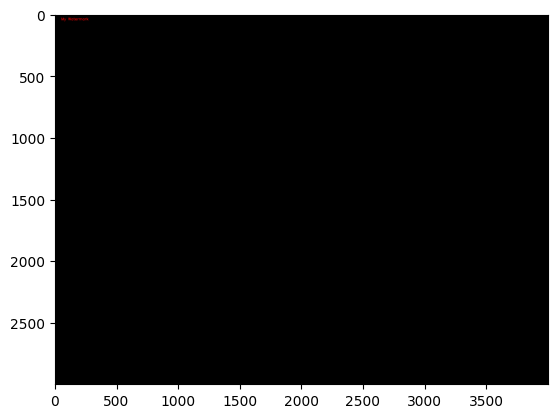

In [7]:
gray_img = cv2.imread('tz.jpg')
watermark = np.zeros(gray_img.shape,np.uint8)
cv2.putText(watermark, 'My Watermark', (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255), 2)
cv2.imwrite('My_Watermark_'+'.jpg',watermark)
plt.imshow(watermark)

7eb087e95061860ec77bdfdc64f190b6


(<matplotlib.image.AxesImage at 0x213a54d8b10>, None)

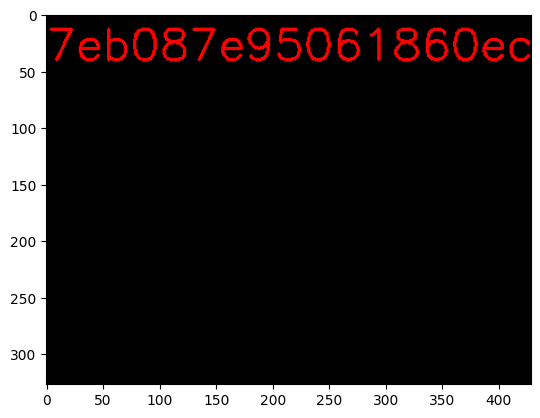

In [8]:
gray_img = cv2.imread('text.jpg')
watermark = np.zeros(gray_img.shape, np.uint8)
cv2.putText(watermark, hashlib.md5('孟令飞'.encode()).hexdigest(), (0,40), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (255), 2)
cv2.imwrite('My_Watermark.jpg',watermark)
plt.imshow(watermark),print(hashlib.md5('孟令飞'.encode()).hexdigest())

C:\Users\Admin\AppData\Local\Temp\ipykernel_19540\3107728234.py:42: RuntimeWarning: divide by zero encountered in log
  plt.imshow(10*np.log(np.abs(tmp)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


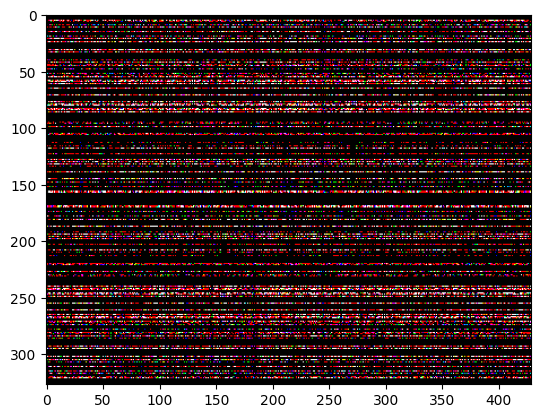

In [15]:
a = "text2.jpg"  
#a = '2023-04-20 140554.png'
#a = '2023-04-20 140536.png'
#b = '20230420170729.jpg'
#a = '8fe834bc37c6fd203ab1e0315f6ae7f.jpg'
a = 'th.jpg'
b = "My_Watermark.jpg"  #水印图片formal/2023-04-20 140536.png
c = "text.jpg"
encode(a,b,c,15)




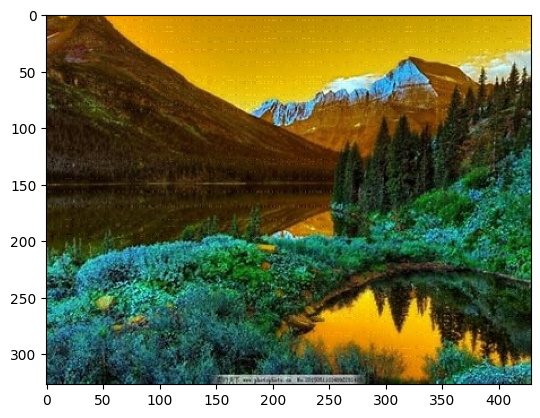

In [16]:
img_1 = cv2.imread("text.jpg")
plt.imshow(img_1)

In [9]:
a=decode("th.jpg","output.jpg",'a.jpg',5)#  水印图片：添加水印后的图片

#a=decode("th.jpg","text.jpg",'a.jpg',1)

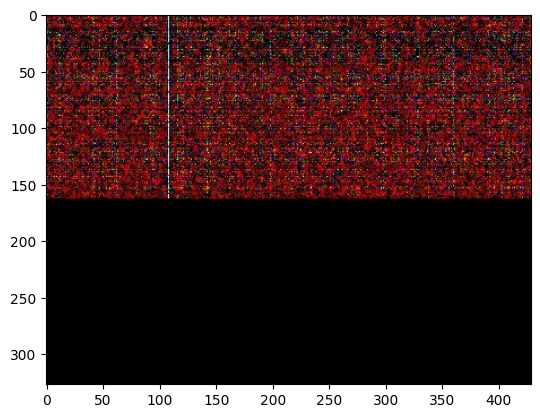

In [10]:
a = cv2.imread("a.jpg")
#cv2.imwrite('My_Watermark_1.jpg',a)
plt.imshow(a)

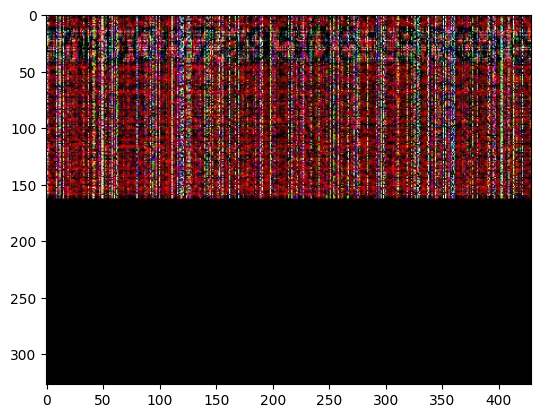

In [13]:


d=decode("R.jpg","text.jpg",'b.jpg',1)#  无关图片：添加水印图片

b = cv2.imread("b.jpg")
plt.imshow(b)
#e=decode("2023-04-20 140554.png","text.jpg",'c.jpg',2)#   原图片：添加水印图片


TypeError: Image data of dtype object cannot be converted to float

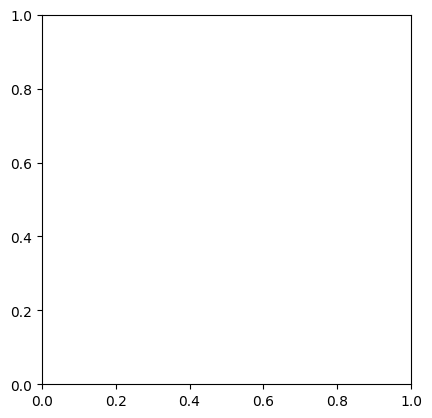

In [14]:
plt.imshow(d)


In [ ]:

plt.imshow(e)

NameError: name 'e' is not defined